# **<center> MPS to PQC <center>**

In [7]:
from variational_algorithms.tensor_networks.tn_algorithms import MPSPQC
from variational_algorithms.tensor_networks.tensor_networks import MPSGenerator, TensorOperations

from numpy import linalg as LA
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import numpy as np

**Analytical decomposition method**

In [8]:
n_sites = 10
chi = 2

randon_state = MPSGenerator(d=2, chi=chi, n_sites=n_sites).random_real_mps()

randon_state_uni = TensorOperations(mps_list=randon_state).truncation_network_left_form(chi=chi)

randon_state_uni[-1] = randon_state_uni[-1] / LA.norm(randon_state_uni[-1])


list_g_tensors, fidelity = MPSPQC(mps_list=randon_state_uni).analytical_decomposition(mode="left", k=1, f=0.8)

print(fidelity)

0.9999921642993944


**Optimization decomposition method**

**test 1**

In [9]:
n_sites = 13
chi = 36
sweeps = 15
ratio = 0.6
f = 0.95


randon_state = MPSGenerator(d=2, chi=chi, n_sites=n_sites).random_real_mps()

randon_state_uni = TensorOperations(mps_list=randon_state).truncation_network_left_form(chi=chi)
randon_state_uni[-1] = randon_state_uni[-1] / LA.norm(randon_state_uni[-1])


list_g_tensors, fidelity_1 = MPSPQC(mps_list=randon_state_uni).optimization_decomposition(
    f=f, sweeps=sweeps, layers=1, ratio=ratio
)

list_g_tensors, fidelity_2 = MPSPQC(mps_list=randon_state_uni).optimization_decomposition(
    f=f, sweeps=sweeps, layers=2, ratio=ratio
)

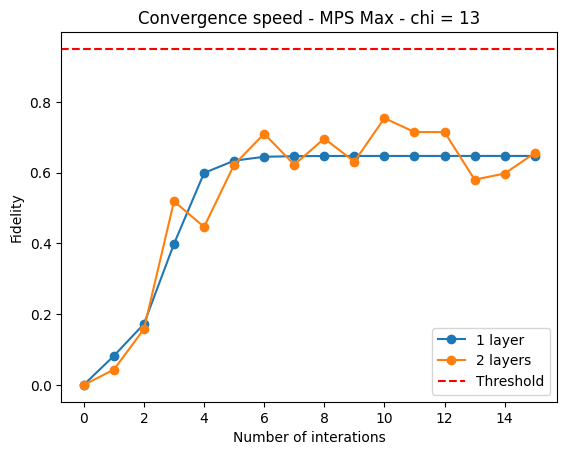

In [10]:
plt.plot(range(len(fidelity_1)), fidelity_1, label="1 layer", marker="o", linestyle="-")
plt.plot(range(len(fidelity_2)), fidelity_2, label="2 layers", marker="o", linestyle="-")
plt.axhline(y=f, color="red", linestyle="--", label="Threshold")


plt.xlabel("Number of interations")
plt.ylabel("Fidelity")
plt.title("Convergence speed - MPS Max - chi = 13")
plt.legend()
plt.show()

**test 2**

In [11]:
n_sites = 10
chi = 8
sweeps = 30
f = 0.95

randon_state = MPSGenerator(d=2, chi=chi, n_sites=n_sites).random_real_mps()

randon_state_uni = TensorOperations(mps_list=randon_state).truncation_network_left_form(chi=chi)

randon_state_uni[-1] = randon_state_uni[-1] / LA.norm(randon_state_uni[-1])


list_g_tensors_c, fidelity = MPSPQC(mps_list=randon_state_uni).analytical_decomposition(mode="left", k=1, f=f)


list_g_tensors, fidelity_with = MPSPQC(mps_list=randon_state_uni).optimization_decomposition(
    f=f, sweeps=sweeps, layers=1, list_g_tensors=list_g_tensors_c
)

list_g_tensors, fidelity_non = MPSPQC(mps_list=randon_state_uni).optimization_decomposition(
    f=f, sweeps=sweeps, layers=1
)

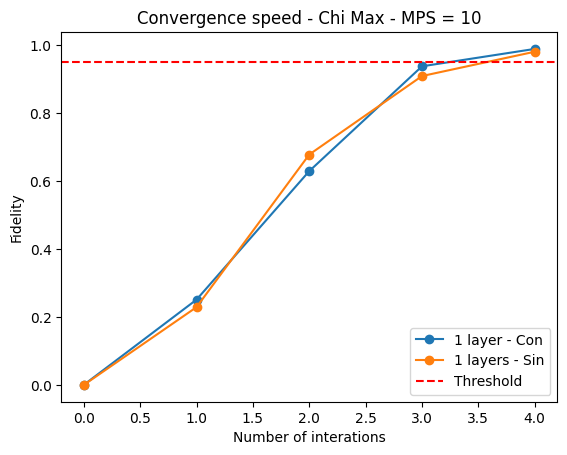

In [12]:
plt.plot(range(len(fidelity_with)), fidelity_with, label="1 layer - Con", marker="o", linestyle="-")
plt.plot(range(len(fidelity_non)), fidelity_non, label="1 layers - Sin", marker="o", linestyle="-")
plt.axhline(y=f, color="red", linestyle="--", label="Threshold")


plt.xlabel("Number of interations")
plt.ylabel("Fidelity")
plt.title("Convergence speed - Chi Max - MPS = 10")
plt.legend()
plt.show()